<a href="https://colab.research.google.com/github/Joaquin-Estevez/ELS-cleaned/blob/main/epaalam_EDA_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELS:2002 EDA V4**


---
##Author: Emmanuel Paalam
##Dataset: has 4012 columns and 16197 rows

##Import necessary libraries, data file

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from google.colab import drive
wr.filterwarnings('ignore')

In [21]:
drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/epaalam-cleaned_els_02_12_byf3pststu_v1_0.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Analysis

In [22]:
df.shape

(13119, 220)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Columns: 220 entries, BYINCOME to BYF10M
dtypes: float64(208), int64(12)
memory usage: 22.0 MB


In [24]:
for column in df.columns:
  if df[column].dtype == 'int64':
      print(column)

BYINCOME
BYGRDRPT
BYG10EP
BYREGURB
F1SEX
F1RACE
F1FCOMP
F1MOTHED
F1FATHED
F1OCCUM
F1OCCUF
F3EVERDO


In [25]:
df['F3EVERDO'].value_counts()

F3EVERDO
0    11771
1     1348
Name: count, dtype: int64

In [26]:
df.isnull().sum()


BYINCOME       0
BYGRDRPT       0
BYSCHPRG     267
BYTXMSTD     267
BYTX1MPP     267
BYTX2MPP     267
BYTX3MPP     267
BYTX4MPP     267
BYTX5MPP     267
BYTXRSTD     267
BYTX1RPP     267
BYTX2RPP     267
BYTX3RPP     267
BYXTRACU    1102
BYHMWRK     1340
BYG10EP        0
BYREGURB       0
BY10FLP     1083
F1SEX          0
F1RACE         0
F1HOMLNG     276
F1DOB_P       56
F1FCOMP        0
F1MOTHED       0
F1FATHED       0
F1OCCUM        0
F1OCCUF        0
F1STEXP      729
F1CTLPTN       2
F1HIMATH     825
F1WRKHRS     960
F1RHTUNP    1027
F1RTRCC     1027
F1RGPP2     1036
F3EVERDO       0
BYS28       1310
BYS37       1091
BYS54A      1345
BYS54B      1371
BYS54C      1367
F1S16A       957
F1S16B       975
F1S16C       896
F1S16F       937
F1S16H       961
F1S30E       891
F1S30F       884
F1S30H       901
F1S30I       895
F1S33        782
F1S34A       952
F1S35A       903
F1S36B       950
F1S37A       805
F1S37D       899
F1S37E       859
F1S37F       845
F1S39A       792
F1S39B       8

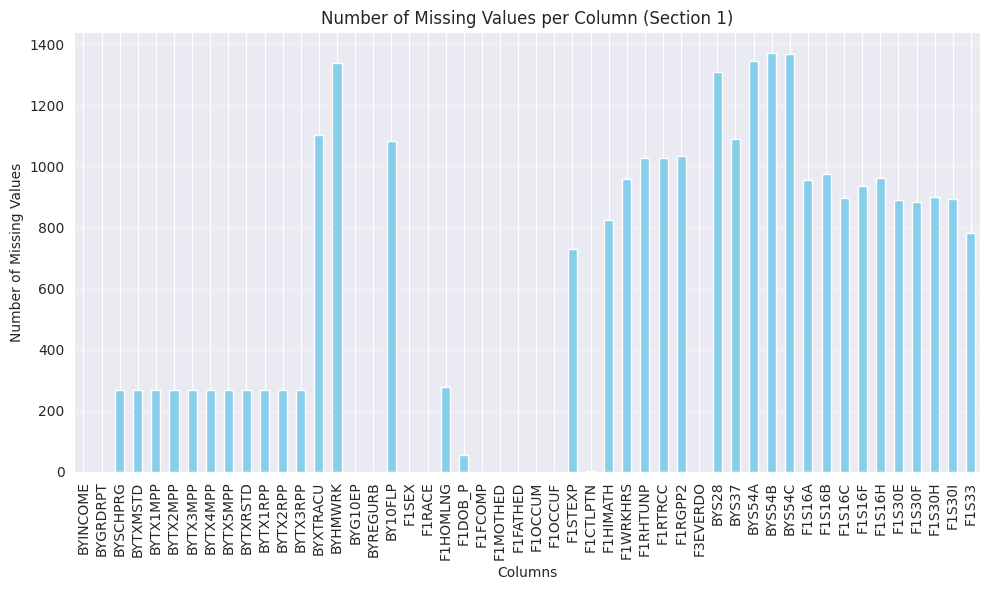

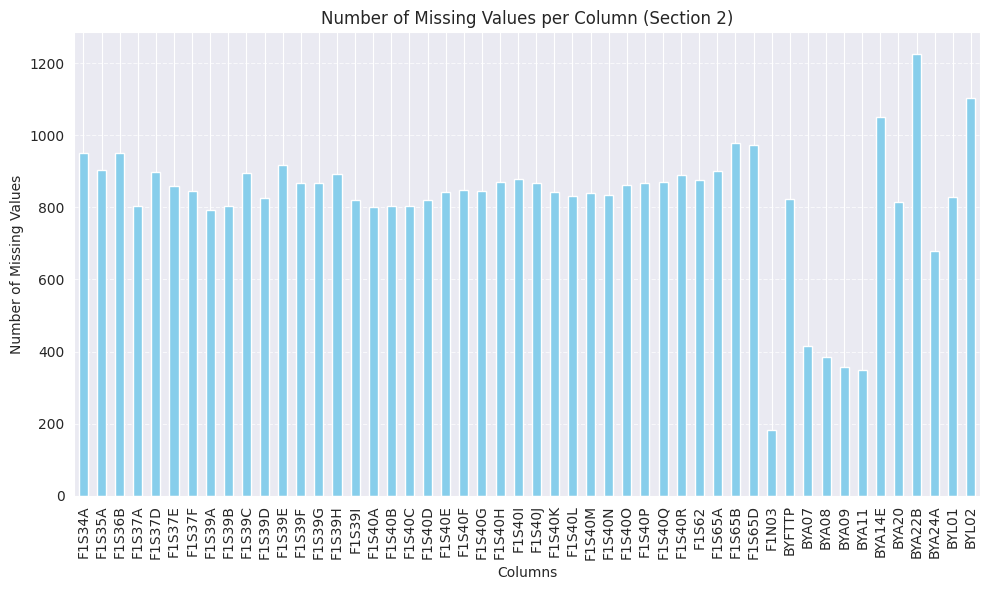

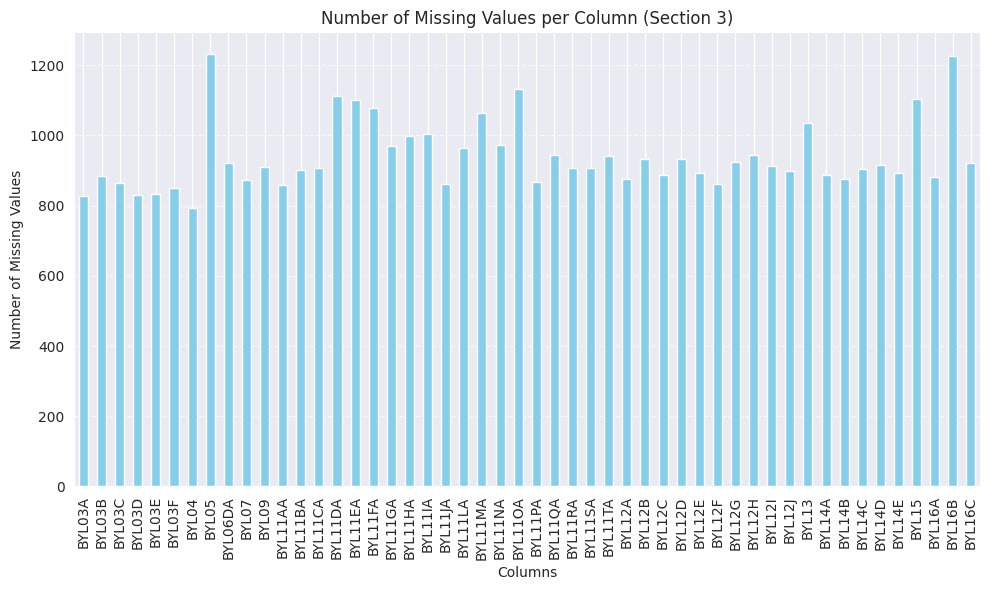

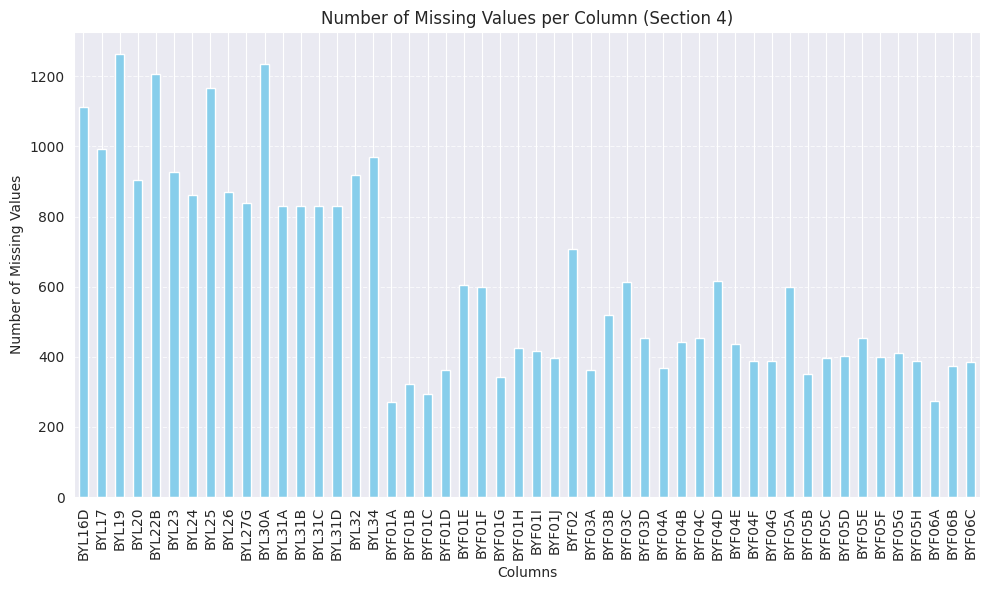

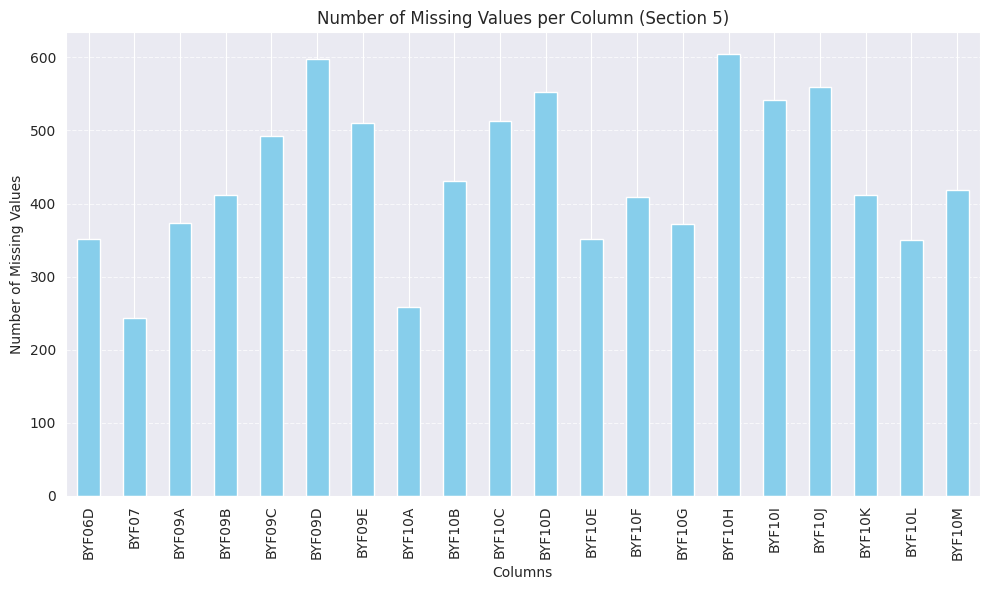

In [27]:
##Divide columns into partitions of 50 or less
num_sections = (len(df.columns) // 50) + 1

## Make a bar graph for each
for i in range(num_sections):
    start_idx = i * 50
    end_idx = min((i + 1) * 50, len(df.columns))
    section_df = df.iloc[:, start_idx:end_idx]

    # Count missing values per column in the section
    missing_values = section_df.isnull().sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Missing Values per Column (Section {i+1})')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Axes: >

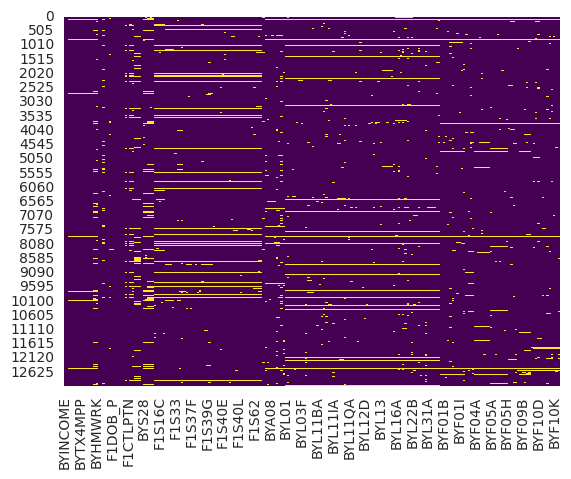

In [28]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [29]:
single_value_columns = df.columns[df.nunique(dropna=False) == 1]

print("Columns with all identical values:")
print(single_value_columns)

Columns with all identical values:
Index([], dtype='object')


In [30]:
df.nunique()

BYINCOME      12
BYGRDRPT       3
BYSCHPRG       3
BYTXMSTD    3929
BYTX1MPP     805
BYTX2MPP     956
BYTX3MPP     931
BYTX4MPP     982
BYTX5MPP     336
BYTXRSTD     927
BYTX1RPP     795
BYTX2RPP    1000
BYTX3RPP     857
BYXTRACU       9
BYHMWRK       47
BYG10EP        7
BYREGURB      12
BY10FLP        7
F1SEX          2
F1RACE         7
F1HOMLNG       6
F1DOB_P       65
F1FCOMP        9
F1MOTHED       8
F1FATHED       8
F1OCCUM       17
F1OCCUF       17
F1STEXP        9
F1CTLPTN      11
F1HIMATH       6
F1WRKHRS      10
F1RHTUNP      29
F1RTRCC        4
F1RGPP2        7
F3EVERDO       2
BYS28          3
BYS37          4
BYS54A         3
BYS54B         3
BYS54C         3
F1S16A         4
F1S16B         4
F1S16C         4
F1S16F         4
F1S16H         4
F1S30E         4
F1S30F         4
F1S30H         4
F1S30I         4
F1S33          8
F1S34A         6
F1S35A         6
F1S36B         6
F1S37A         5
F1S37D         5
F1S37E         5
F1S37F         5
F1S39A         4
F1S39B        

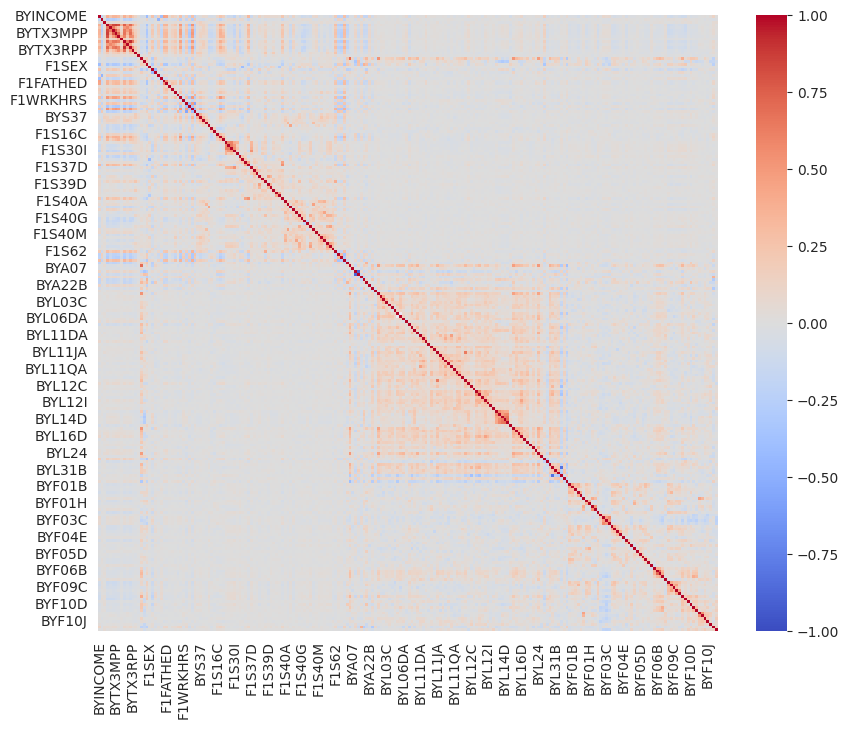

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [32]:
correlated = df.corr()

# Set the threshold for high correlation
threshold = 0.75
print(len(correlated))
# Find pairs of highly correlated variables
high_corr_pairs = [(i, j) for i in correlated for j in correlated
                   if i != j and abs(correlated.loc[i, j]) > threshold]

print("Highly correlated pairs:", high_corr_pairs)
print(len(high_corr_pairs))

220
Highly correlated pairs: [('BYTXMSTD', 'BYTX2MPP'), ('BYTXMSTD', 'BYTX3MPP'), ('BYTXMSTD', 'BYTX4MPP'), ('BYTX2MPP', 'BYTXMSTD'), ('BYTX2MPP', 'BYTX3MPP'), ('BYTX3MPP', 'BYTXMSTD'), ('BYTX3MPP', 'BYTX2MPP'), ('BYTX4MPP', 'BYTXMSTD'), ('BYTXRSTD', 'BYTX2RPP'), ('BYTX2RPP', 'BYTXRSTD'), ('BYA08', 'BYA09'), ('BYA09', 'BYA08'), ('BYL31A', 'BYL31D'), ('BYL31D', 'BYL31A')]
14


In [33]:
pd.set_option('display.max_rows', None)

df.corr()['F3EVERDO'].sort_values(ascending=False).head(100)

F3EVERDO    1.000000
F1CTLPTN    0.349733
F1S65A      0.248812
BYGRDRPT    0.217185
F1RTRCC     0.206526
F1S65B      0.205700
BY10FLP     0.165149
F1S30I      0.154855
F1FCOMP     0.143530
F1WRKHRS    0.139017
F1S30H      0.136151
F1S34A      0.122109
F1S30F      0.121042
F1N03       0.102584
BYA14E      0.091807
BYA20       0.085326
BYG10EP     0.079641
F1S33       0.068931
F1S16B      0.068672
BYA09       0.068124
BYL09       0.067142
F1S37D      0.064335
F1S40G      0.060957
F1S16A      0.059543
F1S40H      0.056535
BYF09A      0.055460
BYF10B      0.054071
F1S35A      0.053875
BYF10A      0.051725
BYREGURB    0.050117
BYL15       0.047417
BYF09B      0.046602
BYF04C      0.046475
F1S40J      0.045131
F1S40Q      0.044673
BYF09E      0.043991
BYF01G      0.043883
BYF09D      0.043725
BYF06B      0.042409
BYF06C      0.042334
BYF10E      0.041896
BYF04F      0.041574
BYS54C      0.038881
F1S30E      0.038576
BYFTTP      0.036839
F1S40I      0.036516
BYF05G      0.035670
BYL17       0

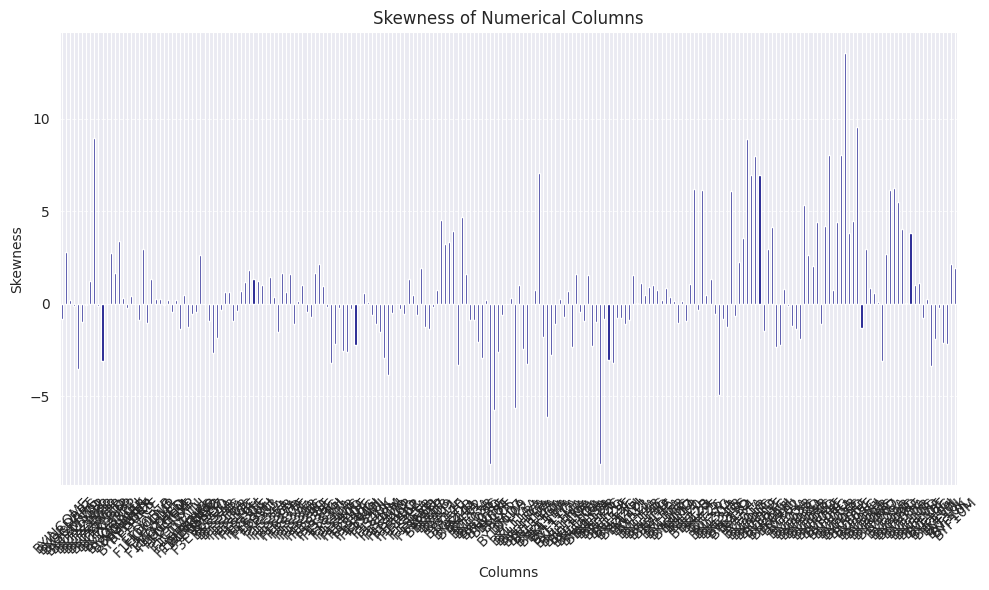

In [34]:
sns.set_style("darkgrid")

# Calculate skewness for each numerical column
skewness_values = df.select_dtypes(include=["int64", "float64"]).skew()

# Plot skewness values
plt.figure(figsize=(10, 6))
skewness_values.plot(kind='bar', color='navy')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

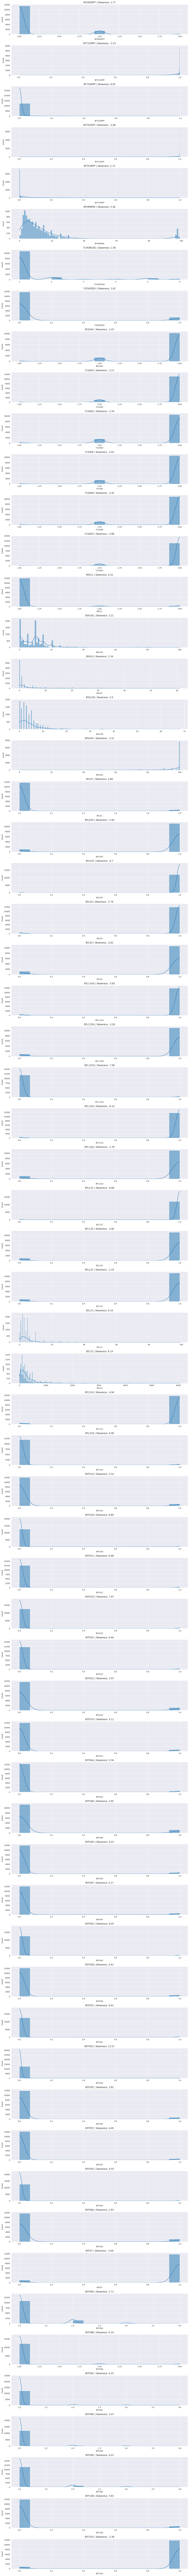

In [35]:
sns.set_style("darkgrid")

skewed_columns = skewness_values[abs(skewness_values) >= 2.5].index

# Plot kernel density plot for each selected column
plt.figure(figsize=(14, len(skewed_columns) * 3))
for idx, column in enumerate(skewed_columns, 1):
    plt.subplot(len(skewed_columns), 1, idx)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column} | Skewness: {round(skewness_values[column], 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()